In [1]:
from closeness_library import closeness_function
from degree_library import degree_function
from edge_clustering_library import edge_clustering_function
# from diameter_library import diameter_function
from pathlib import Path
from ipyleaflet import Map, LayersControl, LayerGroup, Polygon, GeoJSON, LegendControl, FullScreenControl, basemaps, basemap_to_tiles
from ipywidgets.embed import embed_minimal_html
import json
import random
from tqdm.auto import tqdm
import pandas as pd
from itertools import chain
from matplotlib import cm
from matplotlib.colors import ListedColormap,LinearSegmentedColormap, Normalize
#from shapely.geometry import Point, LineString
from geojson import Feature, LineString
import numpy as np
import geopandas as gpd
from geojson_length import calculate_distance, Unit
from shapely.geometry import Point as geoPoint, Polygon as geoPolygon
from shapely import wkt
import geojson
from pyproj import Geod
from area import area
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
weight =  {
('a','c'): 1,
('b','c'): 2,
('c','d'): 3,
('d','e'): 4,
('f','h'): 2,
('g','h'): 1,
('h','i'): 4,
('i','e'): 3,
('j','l'): 1,
('k','l'): 4,
('l','m'): 3,
('m','e'): 4,
('e','n'): 2,
('n','o'): 3,
('o','p'): 1,
('p','q'): 4,
('q','r'): 3,
('q','k1'): 2,
('q','t'): 2,
('p','s'): 1,
('s','v'): 3,
('v','e1'): 2,
('e1','d1'): 3,
('d1','c1'): 4,
('c1','b1'): 3,
('b1','a1'): 4,
('o','k1'): 3,
('k1','q'): 1,
('k1','r'): 3,
('q','r'): 2,
('q','t'): 4,
('t','w'): 1,
('w','c1'): 4,
('v','w'): 3,
('t','s'): 1,
('r','u'): 4,
('u','z'): 2,
('z','a1'): 2,
('w','z'): 2,
('u','t'): 4,
('o','g1'): 1,
('g1','h1'): 3,
('h1','i1'): 3,
('k1','f1'): 4,
('f1','l1'): 3,
('l1','n1'): 1,
('n1','o1'): 2,
('k1','j1'): 1,
('j1','m1'): 4,
('m1','o1'): 4,
('j1','l1'): 2,
('j1','b2'): 1,
('l1','b2'): 4,
('m1','b2'): 3,
('b2','o1'): 3,
('b2','n1'): 1,
('f1','p1'): 4,
('p1','q1'): 1,
('q1','r1'): 2,
('q1','s1'): 1,
('p1','t1'): 2,
('t1','u1'): 3,
('t1','v1'): 1,
('p1','w1'): 4,
('w1','z1'): 2,
('w1','a2'): 3,
}
G = nx.Graph()
for endpoints, weight in weight.items():
    G.add_edge(endpoints[0], endpoints[1], weight=weight)
pos = {
'a' : np.array([-5.0215337305401,1.223265423794]),
'b' : np.array([-5.001068614261,0.7730328656544]),
'c' : np.array([-4.2438593119354,0.9776840284451]),
'd' : np.array([-3.527580242168,0.7525677493754]),
'e' : np.array([-2.8113011724005,0.5683817028637]),
'f' : np.array([-4.9340970450932,-0.2655990708621]),
'g' : np.array([-4.8978310930543,-0.5919926392119]),
'h' : np.array([-4.3175758604326,-0.3562639509593]),
'i' : np.array([-3.6466557477137,0.1061269375362]),
'j' : np.array([-4.5079721086366,-1.1813143598433]),
'k' : np.array([-4.3175758604326,-1.444242512125]),
'l' : np.array([-3.9821158040731,-0.7189234713479]),
'm' : np.array([-3.4653259875194,-0.1568012147456]),
'n' : np.array([-1.8893288932625,0.6754002207058]),
'o' : np.array([-0.8403397686802,0.8178555339206]),
'p' : np.array([-1.2806561913444,1.3617758207411]),
'q' : np.array([-0.7755873535826,1.530132099995]),
'r' : np.array([-0.2575680328012,1.6078349981123]),
's' : np.array([-1.6950716479695,1.7632407943467]),
't' : np.array([-1,2]),
'u' : np.array([-0.3093699648793,2.2165077000304]),
'v' : np.array([-1.9152298593016,2.2165077000304]),
'w' : np.array([-1.2547552253053,2.5791212245774]),
'z' : np.array([-0.3093699648793,2.7345270208118]),
'a1' : np.array([-0.5036272101723,3.1230415113978]),
'b1' : np.array([-0.930993149817,3.1359919944174]),
'c1' : np.array([-1.3324581234225,3.1618929604564]),
'd1' : np.array([-1.7209726140086,3.1100910283783]),
'e1' : np.array([-2.1483385536532,3.006487164222]),
'f1' : np.array([0.3899561181756,1.1545680924285]),
'g1' : np.array([-0.9439436328365,0.222133315022]),
'h1' : np.array([-1.1122999120905,-0.360638420857]),
'i1' : np.array([-1.2806561913444,-0.9304596737166]),
'j1' : np.array([0.1697979068435,0.5976973225885]),
'k1' : np.array([-0.205766100723,1.0898156773309]),
'l1' : np.array([0.933876404996,0.7401526358034]),
'm1' : np.array([0.377005635156,0.0667275187876]),
'n1' : np.array([1.4000937936993,0.1703313829439]),
'o1' : np.array([1.1281336502891,-0.5678461491696]),
'p1' : np.array([1.0374802691523,1.7761912773662]),
'q1' : np.array([1.3482918616211,2.7086260547727]),
'r1' : np.array([1.3094404125625,3.5115560019839]),
's1' : np.array([1.8404102163635,3.4986055189643]),
't1' : np.array([1.8792616654221,2.2942105981476]),
'u1' : np.array([2.5526867824379,2.9417347491243]),
'v1' : np.array([2.6951420956528,2.6309231566555]),
'w1' : np.array([1.9569645635393,1.6596369301904]),
'z1' : np.array([2.8764488579263,1.698488379249]),
'a2' : np.array([2.77284499377,1.3617758207411]),
'b2' : np.array([0.907975438957,0.3127866961588])
}

In [7]:
def create_second_graph(G):
    # Create a new graph with the same nodes as G
    G2 = nx.Graph()
    G2.add_nodes_from(G.nodes())

    # Add edges to G2 with key=1 and weight=weight/key
    for endpoint1, endpoint2, data in G.edges(data=True):
        G2.add_edge(endpoint1, endpoint2, weight=4)

    return G2

def diameter_function(G, parameter):
    G2 = create_second_graph(G)
    # Create a new graph H with the largest connected component of the subgraph G where all the edges have weight greater or equal to 3
    H = nx.Graph()
    for u, v, weight in G.edges(data='weight'):
        if weight >= parameter+1:
            H.add_edge(u, v, weight=weight['weight'])

    # Get the largest connected component of H
    largest_cc = max(nx.connected_components(H), key=len)
    W = H.subgraph(largest_cc)

    # Get the largest connected component of G2
    largest_cc_G2 = max(nx.connected_components(G2), key=len)
    
    W1 = G2.subgraph(largest_cc_G2)
    # print(len(W.edges()), len(W1.edges()))
    # Create a color map for the edges
    # ratio = []
    # W_edges = W.edges()
    # for u, v in G.edges():
    #     if ((u,v) in W_edges or (v, u) in W_edges):
    #         ratio.append(100)
    #     else:
    #         ratio.append(0)
    md = min(nx.diameter(W), nx.diameter(W1))
    print(len(W.edges()), len(W1.edges()), md, nx.diameter(W1), (len(W.nodes()) )/(len(W1.nodes()) ) )
    return (len(W.nodes())+sum(d['weight'] for u, v, d in W.edges(data=True)))/(len(W1.nodes())+sum(d['weight'] for u, v, d in W1.edges(data=True))) 

In [8]:

# edges_2 = [(u, v) for u, v, data in G.edges(data=True) if data['weight'] == 2]
# print(len(edges_2))
# betweenness = nx.edge_betweenness_centrality(G, k=None, normalized=True, weight='weight', seed=None)
# betweenness_2 = {e: betweenness[e] for e in edges_2}
# # Sort the edges with weight 2 by their betweenness centrality
# sorted_edges_2 = [e for e, _ in sorted(betweenness_2.items(), key=lambda x: x[1], reverse=True)]

C:\Users\camperom\AppData\Local\Temp\ipykernel_17868\89159725.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))
C:\Users\camperom\AppData\Local\Temp\ipykernel_17868\89159725.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


1.0 0.0


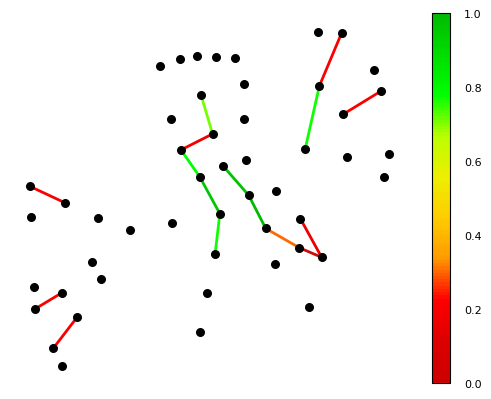

In [9]:
parameter = 1
bca= {edge: centrality for edge, centrality in nx.edge_betweenness_centrality(G).items() if G.edges[edge]['weight'] == parameter}

edge_betweenness = {}
s_bca = max(list(bca.values()))
for i in list(bca.keys()):
    edge_betweenness[i] = (bca[i]/s_bca)

# Sort the edges by their betweenness centrality in descending order
sorted_edges = sorted(edge_betweenness, key=edge_betweenness.get, reverse=True)
edge_sets = sorted_edges 
set_centralities = [edge_betweenness[edge] for edge in sorted_edges]
maxcentrialities = max(set_centralities)
mincentralities = min(set_centralities)
set_centralities = [(edge_set-mincentralities)/(maxcentrialities-mincentralities) for edge_set in set_centralities ]

# Create a colormap for the edge colors
edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))

# Draw the graph with the edges colored according to their betweenness centrality

# print(len(set_centralities))
# for i in set_centralities:
#     s1 = s1 + len(i)
# print(s1)
fig, ax = plt.subplots()
# pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=30, node_color='black')
print(max(set_centralities), min(set_centralities))
for i, edge_set in enumerate(edge_sets):
    # Draw the edges in the first set with colors based on their betweenness centrality
    # print(i, len(edge_set))
    # print(len([edge_color_map((edge_betweenness[edge] - min(edge_betweenness.values())) / (max(edge_betweenness.values()) - min(edge_betweenness.values()))) for edge in edge_set]))
    edge_color_v = [set_centralities[i]]
    # print(len(edge_color_v)) 
    # print(set_centralities[i])
    nx.draw_networkx_edges(G, pos, edgelist=[edge_set], edge_color=edge_color_v, width=2, edge_cmap=edge_color_map, edge_vmin=min(set_centralities), edge_vmax=max(set_centralities))
#np.full(np.arange(len(edge_set)), set_centralities[i])

# Add a colorbar for the edge colors
sm = cm.ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(set_centralities), vmax=max(set_centralities)))
cbar = plt.colorbar(sm)
cbar.ax.tick_params( which='both', length=0, pad=10, labelcolor='black', labelsize=8)
# sm = cm.ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(set_centralities), vmax=max(set_centralities)), )
# sm.set_array([])
# cbar = plt.colorbar(sm, shrink=0.5)
# cbar.ax.tick_params( which='both', length=0, pad=10, labelcolor='black', labelsize=12)
# cbar.ax.yaxis.set_ticks_position('left')
# cbar.ax.yaxis.set_label_position('left')
# cbar.ax.set_ylabel('Betweenness Centrality', rotation=270, fontsize=14, labelpad=20)
# cbar.ax.yaxis.set_tick_params(width=0)
# Show the plot
plt.axis('off')
plt.savefig(f"academic_example_betweeness_2.png", dpi=800, bbox_inches='tight')
plt.show()

In [10]:
# print([betweenness[e] for e, _ in sorted(betweenness_2.items(), key=lambda x: x[1], reverse=True)])

strength = []
closeness = []
edge_clustering = []
diameter = []
strength.append(degree_function(G))
closeness.append(closeness_function(G))
edge_clustering.append(edge_clustering_function(G, parameter))
diameter.append(diameter_function(G, parameter))
for e in sorted_edges:
    G[e[0]][e[1]]['weight'] = parameter+1
    strength.append(degree_function(G))
    closeness.append(closeness_function(G))
    edge_clustering.append(edge_clustering_function(G, parameter))
    diameter.append(diameter_function(G, parameter))
print(strength[len(strength)-1]-strength[0])
print(closeness[len(closeness)-1]-closeness[0])
print(edge_clustering[len(edge_clustering)-1]-edge_clustering[0])
print(edge_clustering[len(edge_clustering)-1]-edge_clustering[0])
np.linalg.norm(np.array([strength[len(strength)-1]-strength[0], closeness[len(closeness)-1]-closeness[0], edge_clustering[len(edge_clustering)-1]-edge_clustering[0], edge_clustering[len(edge_clustering)-1]-edge_clustering[0]]))
    

TypeError: 'int' object is not subscriptable

In [ ]:
# vv =[0.06349206349206349,
# 0.038289878513884934,
# 0.6538461538461539,
# 0.6538461538461539]
# s=0
# for i in range(len(vv)):
#     s = s + vv[i]*vv[i]
# print(np.sqrt(s))

In [ ]:
def compute_norms(values):
    # Convert the list of vectors to a numpy array
    values_array = np.array(values)

    # Compute the difference between each vector and the first vector
    diff = values_array - values_array[0]

    # Compute the norm of each row in the difference array
    norms = np.linalg.norm(diff, axis=1)

    return norms

# print(compute_norms(vector_functions))

C:\Users\camperom\AppData\Local\Temp\ipykernel_14608\3862105599.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))


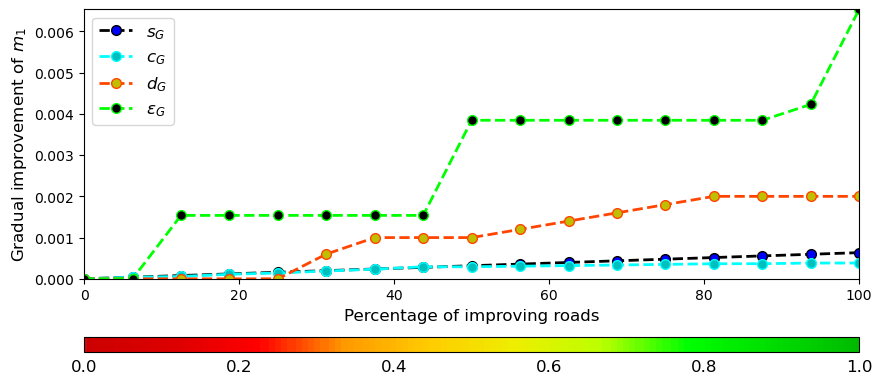

In [ ]:
vec_aux = []
for i in range(len(strength)):
    vec_aux.append([strength[i], closeness[i], diameter[i]])
vec_aux = np.array(vec_aux)/100
# vec_aux = vec_aux / np.linalg.norm(vec_aux, axis=0)
vec_aux = vec_aux - vec_aux[0]
x1 = np.linspace(0, 100, len(vec_aux))

# Define the colormap
edge_color_map = ListedColormap(cm.get_cmap('nipy_spectral_r', 256)(np.linspace(0.05, 0.50, 256)))

# Plot the data
fig, ax = plt.subplots(figsize=(10, 5))
markers = ["," , "o" , "^" , "<"]
colors = ['#000000','#00FFFF', '#FF4500','#00FF00']
colors_edge = ['b','c', 'y', 'k']
labels = ['$s_{G}$ ','$c_{G}$','$d_{G}$','$ \\varepsilon_{G}$']
# differences = [diff_1, diff_2, diff_3, diff_4]
for i in range(3):
    plt.plot(x1, vec_aux[:, i],
                color=colors[i],
                markeredgecolor=colors[i],
                lw=2,
                ls='--',
                markerfacecolor=colors_edge[i],
                marker='o',
                #edgecolor=colors_edge[i],
                label=labels[i],
                markersize=7)
# for i in range(4):
#     ax.plot(x1, vec_aux[:, i], color='#FF1493', markeredgecolor="#009ACD", lw=2, ls='--', markerfacecolor="#00C957", marker='s', label=["Strength", "Closeness", "Diameter", "Edge Clustering"][i], markersize=7)

# Set the x and y limits
ax.set_xlim([min(x1), max(x1)])
# ax.set_ylim([min(edge_clustering), max(edge_clustering)])
ax.set_ylim([min(vec_aux.flatten()), max(vec_aux.flatten())])

# Add a horizontal colorbar
cbar = fig.colorbar(cm.ScalarMappable(cmap=edge_color_map, norm=plt.Normalize(vmin=min(set_centralities), vmax=max(set_centralities))), ax=ax, orientation='horizontal', aspect=50)
cbar.ax.tick_params(which='both', length=0, pad=5, labelcolor='black', labelsize=12)

# Set the x and y labels
ax.set_xlabel("Percentage of improving roads", fontsize=12)
ax.set_ylabel(r'Gradual improvement of $ m_{1}$', fontsize=12)

# Set the legend
ax.legend(loc='upper left', fontsize=12)

# Save and show the plot
plt.savefig('academic_example_updgradate.png', dpi=800)
plt.show()

In [ ]:
# diff_1 = []
# diff_2 = []
# diff_3 = []
# diff_4 = []
# x1 = []
# for i in range(len(strength)):
#     diff_1.append(np.linalg.norm(strength[i]-strength[0]))
#     diff_2.append(np.linalg.norm(closeness[i] - closeness[0]))
#     diff_3.append(np.linalg.norm(diameter[i] - diameter[0]))
#     diff_4.append(np.linalg.norm(edge_clustering[i] - edge_clustering[0]))
#     x1.append(i)
# #print(diff_1)
# #print(diff_2)
# fig = plt.figure(figsize=(10, 5))
# #markers = ["." , "," , "o" , "v" , "^" , "<", ">"]
# #colors = ['r','g','b','c','m', 'y', 'k']
# markers = ["," , "o" , "^" , "<"]
# colors = ['#000000','#00FFFF', '#FF4500','#00FF00']
# colors_edge = ['b','c', 'y', 'k']
# # labels = ['Strength ','Closeness','Connected-component','Edge-Clustering']
# labels = ['$s_{G}$ ','$c_{G}$','$d_{G}$','$ \\varepsilon_{G}$']
# differences = [diff_1, diff_2, diff_3, diff_4]
# for i in range(4):
#     plt.plot(x1, differences[i],
#                 color=colors[i],
#                 markeredgecolor=colors[i],
#                 lw=2,
#                 ls='--',
#                 markerfacecolor=colors_edge[i],
#                 marker='o',
#                 #edgecolor=colors_edge[i],
#                 label=labels[i],
#                 markersize=7)



# plt.legend(loc='upper left', fontsize="12")
# #plt.legend(loc='upper right', fontsize="12")
# plt.ylabel("Euclidean norm of global safety", fontsize="12")
# plt.xlabel("Number of improving edges", fontsize="16")
# #plt.title("Impact of soft transport network two level improvements")
# # plt.savefig('./Images/second_scenario_2.png', dpi=800)
# plt.savefig('academic_example_updgradate.png', dpi=800)
# plt.show()

In [ ]:
print(diameter)

[0.8, 0.8, 0.8, 0.8, 0.8, 0.86, 0.9, 0.9, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.0, 1.0, 1.0]


In [ ]:
strength = [57.48899051490509,
60.7497035907859,
69.60683434959354,
65.98217310298101]
closeness = [41.51450533162684,
42.97032036943504,
49.6673658667563,
50.85303463904487]
diameter = [30.00554631170272, 30.00554631170272, 86.18968386023295, 30.00554631170272]
edge_clustering = [5.2631578947368425,
5.2631578947368425,
71.9298245614035,
5.2631578947368425]
vec_aux = []
for i in range(len(strength)):
    vec_aux.append([strength[i], closeness[i], diameter[i], edge_clustering[i]])
vec_aux = compute_norms(vec_aux)
print(vec_aux)

[ 0.          3.57094486 88.39916872 12.62308521]


In [ ]:
vector = [5,7,8,9,10,11,12,13,14,15,16,17,2,3,4,18,20,21,22,23,24,17,34,35,37,36,38,3,26,1,28,29,32,33,19,20,21]
sorted_vector = sorted(vector)
print(sorted_vector)

[1, 2, 3, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 17, 18, 19, 20, 20, 21, 21, 22, 23, 24, 26, 28, 29, 32, 33, 34, 35, 36, 37, 38]


In [ ]:
for i in range(1, 39):
    if (i not in sorted_vector):
        print(i)

6
25
27
30
31
